## What is Machine Learning?



**Machine Learning (ML)** is a branch of **Artificial Intelligence (AI)** that focuses on developing systems that can **learn from data** and **improve their performance** over time **without being explicitly programmed**.  

In simpler terms, instead of giving a computer strict instructions, you provide it with examples or data — and it **learns patterns** from that data to make **predictions or decisions**.

### Example:
- A spam filter learns to identify unwanted emails by analyzing thousands of examples of spam and non-spam messages.

### Key Idea:
Machine Learning = **Data + Algorithms → Learning → Predictions**

In [2]:
# first -> linear regression model
# import necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# generate some X data to formulate some sort of relationship y = f(X) + noise

# first generate X values [this is actually a one dimensional dataset]
X = np.linspace(0, 10, 20)

print(X)
# print(X.shape)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [4]:
# create seed for reproducibility
np.random.seed(42)
y = 2.5 * X + np.random.normal(0, 2, X.shape)
print(y)

[ 0.99342831  1.03926087  3.92695602  6.99342813  4.79485115  6.11067345
 11.05316247 10.74539577  9.58736702 12.92722535 12.23105935 13.5422247
 16.27339823 13.27870267 14.97121697 18.61226705 19.02696934 22.99691572
 21.86816238 22.1753926 ]


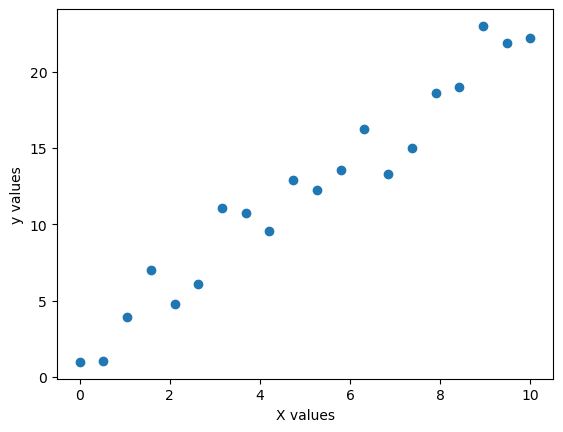

In [5]:
plt.scatter(X, y)
plt.xlabel('X values')
plt.ylabel('y values')
plt.show()

## Cost Function in Linear Regression

In **Linear Regression**, our goal is to find the best-fitting line that predicts the target variable `y` from the input variable `x`.  
This line is represented by the equation:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

Here:
- $h_\theta(x)$ — the **hypothesis** or **predicted value**
- $\theta_0$ — the **intercept** (bias term)
- $\theta_1$ — the **slope** (weight or coefficient)
- $x$ — the **input feature**

---

### 🔹 What is the Cost Function?

The **Cost Function**, also called the **Loss Function**, measures **how far our predictions are from the actual values**.  
It tells us how "bad" or "good" our model is performing.

In **Linear Regression**, we use the **Mean Squared Error (MSE)** as the cost function:

$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Where:

- $J(\theta_0, \theta_1)$ — the **cost function**
- $m$ — the **number of training examples**
- $h_\theta(x^{(i)})$ — the **predicted value** for the $i^{\text{th}}$ example
- $y^{(i)}$ — the **actual (true) value** for the $i^{\text{th}}$ example

---

### 🔹 Why the Square?

By squaring the differences:
- We ensure that **errors do not cancel out**
- We **penalize larger errors more heavily**, making the model focus on minimizing big mistakes.

---

### 🔹 Objective

The goal of training is to **find the parameters** $\theta_0$ and $\theta_1$ that **minimize** the cost function:

$$
\min_{\theta_0, \theta_1} J(\theta_0, \theta_1)
$$

This is typically done using an optimization algorithm called **Gradient Descent**, which gradually updates $\theta_0$ and $\theta_1$ to reduce the cost.

In [6]:
# cost function but initialize theta with zeros

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

In [7]:
# create a model training function using gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [9]:
# add bias term to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]

theta, cost = gradient_descent(X_b, y, theta=np.zeros(X_b.shape[1]), learning_rate=0.001, iterations=1000)
print("Optimized theta:", theta)
print("Final cost:", cost[-1])

Optimized theta: [0.61921406 2.25862038]
Final cost: 1.2083474754601369


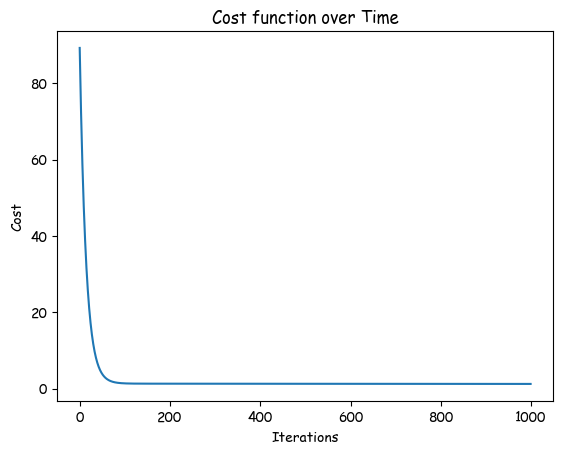

In [10]:
# plot the cost history
plt.rcParams['font.family'] = 'Comic Sans MS'   
plt.plot(range(len(cost)), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over Time')
plt.show()

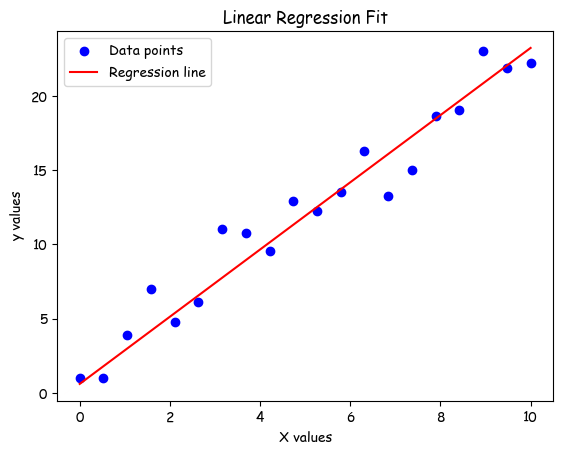

In [11]:
#  plot the regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, X_b.dot(theta), color='red', label='Regression line')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [12]:
# you can now make predictions using the optimized theta
X_new = np.array([[1, 0], [1, 10]])  #
y_predict = X_new.dot(theta)
print("Predictions:", y_predict)

Predictions: [ 0.61921406 23.20541784]


In [14]:
# check the accuracy of the model using R^2 score
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

y_pred_linear = X_b.dot(theta)
r2 = r2_score(y, y_pred_linear)
print("R² Score:", r2)

R² Score: 0.944627407583485


In [16]:
# =============================================================   

## Logistic Regression

In **Logistic Regression**, the goal is to predict a **binary outcome** (0 or 1).  
Instead of fitting a straight line, we model the **probability** that the output belongs to class 1.

---

### 🔹 The Hypothesis Function

Linear regression uses a linear function, but logistic regression applies the **sigmoid function** to squash values into the range (0, 1):

$$
h_\theta(x) = \sigma(\theta^T x)
$$

Where the sigmoid function is:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This ensures:

- If $z$ is large positive → $\sigma(z) \approx 1$
- If $z$ is large negative → $\sigma(z) \approx 0$

---

### 🔹 Interpreting the Output

$h_\theta(x)$ gives the **probability** that $y = 1$:

$$
h_\theta(x) = P(y = 1 \mid x; \theta)
$$

---

### 🔹 Cost Function for Logistic Regression

The cost function used is the **Log Loss** (Binary Cross-Entropy):

$$
J(\theta) =
-\frac{1}{m}
\sum_{i=1}^{m}
\left[
y^{(i)} \log(h_\theta(x^{(i)})) +
(1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))
\right]
$$

Where:
- $m$ — number of training examples  
- $y^{(i)}$ — actual label (0 or 1)  
- $h_\theta(x^{(i)})$ — predicted probability for the $i^{\text{th}}$ example  

---

### 🔹 Why This Cost Function?

This cost function:

- penalizes **confident but wrong** predictions heavily  
- creates a **smooth, convex** surface (good for gradient descent)  
- works perfectly for probability outputs  

Example intuition:
- Predicting 0.99 when the true label is 1 → **low cost**  
- Predicting 0.01 when true label is 1 → **huge cost**

---

### 🔹 Gradient Descent Update Rule

To minimize the cost, we update parameters $\theta$ using:

$$
\theta_j := \theta_j - \alpha \frac{1}{m}
\sum_{i=1}^{m}
\left(
h_\theta(x^{(i)}) - y^{(i)}
\right)
x_j^{(i)}
$$

Where:
- $\alpha$ is the **learning rate**
- $x_j^{(i)}$ is feature $j$ of training example $i$

---

### 🔹 Decision Boundary

The classification rule is:

$$
\text{Predict } 1 \text{ if } h_\theta(x) \ge 0.5, \text{ otherwise } 0
$$

This creates a **decision boundary** — a line (in 2D) or hyperplane (in higher dimensions).

---

### 🔹 Summary

Logistic Regression:
- outputs **probabilities**
- uses the **sigmoid** function
- minimizes **log loss**
- is trained using **gradient descent**
- produces a **linear decision boundary**

It is one of the most important and widely used classification algorithms.

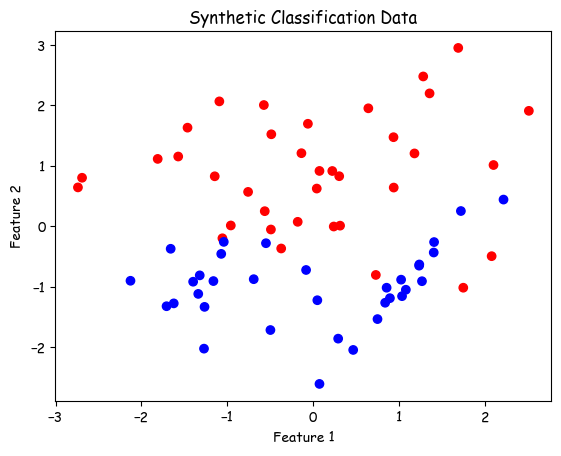

In [15]:
# now lets now move to logistic regression

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=70, n_features=2, n_informative=2, n_redundant=0, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Classification Data')
plt.show()

In [17]:
# now lets start by cost function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# logistic cost function
def compute_logistic_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(X.dot(theta))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [18]:
# add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]
# print(X_b)


# logistic regression training function using gradient descent
def logistic_gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = sigmoid(X.dot(theta))
        errors = predictions - y
        gradients = (1 / m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        cost = compute_logistic_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

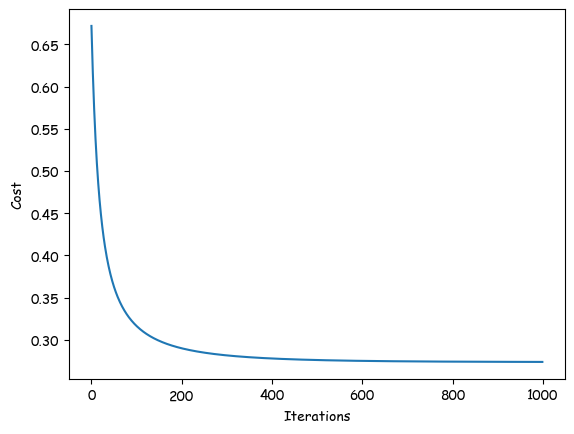

In [19]:
# plot the cost history for logistic regression
theta_logistic, cost_logistic = logistic_gradient_descent(X_b, y, theta=np.zeros(X_b.shape[1]), learning_rate=0.1, iterations=1000)
plt.plot(range(len(cost_logistic)), cost_logistic)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [24]:
# make predictions and evaluate accuracy
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

y_pred = predict(X_b, theta_logistic)
accuracy = np.mean(y_pred == y)
print(f"Logistic Regression Accuracy: {accuracy.round(2)}%")

Logistic Regression Accuracy: 0.91%


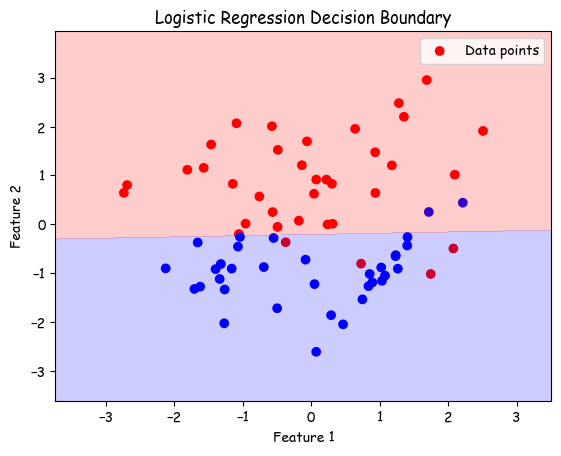

In [25]:
# fit logist regression line on the data
#  plot the line on the data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', label='Data points')
# create a grid to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_b = np.c_[np.ones((grid.shape[0], 1)), grid]
probs = sigmoid(grid_b.dot(theta_logistic)).reshape(xx.shape)
plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()


In [ ]:
# end of code